<a href="https://colab.research.google.com/github/SamNdirangu/NLP-with-SVM-Random-Forest-NaiveBayes/blob/master/NLP_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

Here I implement a simple natural language processing and classification algorithm.

I chose to implement ot using multiple classification techniques and measure their performance comparatively.

I've used the dataset from the SuperDatascience.com nlp machine learning datasets

## Step 1: Do our imports

In [0]:
#Helper libraries
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd #To access our data

## Step 2: Import and Clean our Dataset

In [22]:
#The data is stoed as a tsv so we'll still use read_csv but use a tab as a 
# delimiter instead of the default comma
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter ='\t', quoting = 3)
dataset.shape

(1000, 2)

#### Do a bit of exploring

In [23]:
#Display the first the 50 rows of our data
dataset.iloc[1:50, :]

,Review,Liked
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1
10,Service was very prompt.,1


### Clean Dataset
We now clean the dataset and get rid of stop words. These are words that don't really add  much value to the classificaton problem as they are words that do not express any emotional or feeling towards a certain thing. Most of this words are conjuctions and verbs. Thinking of it practicaly there are certain words when we hear or read from a sentence allow is to immedidately know the attitude of the sentence towards something, words such as irritating, disgusting, sweet, kind are all examples of words that arent stop words. Stop words might include, the ,and , you, when etc. We also clean the data and get rid of punctuations.

The reason to do this is to reduce the size of our dataset and reduce the classification complexity by having fewer features to process.

In [24]:
# Clean the texts
import re #Regular expression
import nltk #Natural language toolkit

#From nltk we get their collectionf of stopwords

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

corpus = []
for i in range(0,1000):
  #Substitute anything that isnt a letter to a space for each review
  review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
  #Convert all to lower case
  review = review.lower()
  # Split the review into different words that are separated by a space
  review = review.split()
  # Stemming is simply converts a word in different teses to its root self
  # An example loves, loved, lovely to just love
  ps = PorterStemmer()
  # Do not add words that are in the stop words
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  # Join our previously split words back again separated with a space
  review = ' '.join(review)  
  corpus.append(review)

  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Do again a bit of exploring
Let's see our clean dataset

In [25]:
corpus[1:50]

['crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place accid could happier',


## Step 4: Create a bag of words model

This step scans through each through each row of our corpus and creating a collumn for each each word then fills each collumn for each row as 0 or  1 if the particular row doesnt have that word the respective collumn for that word is filled as a zero.

The result is  a matrix that is largely filled with zeros and is refered to as a sparse matrix, the result is then our x
where the rows are our different reviews and the collumns our new features

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
# This is achieved is using 
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

View our X after tokenizations

In [27]:
#This is now our X which we can now feed to our classifiation algorithm
x.shape

(1000, 1500)

## Step 5: Create Validation Partitions

K-Fold and Hold Out

In [31]:
from sklearn.model_selection import train_test_split, KFold
kf = KFold(n_splits = 5, shuffle = True)
kf.get_n_splits(x)

print(kf)  

for train_index, test_index in kf.split(x):
   x_train, x_test = x[train_index], x[test_index]
   y_train, y_test = y[train_index], y[test_index]
    

KFold(n_splits=5, random_state=None, shuffle=True)


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)


## Step 6: Train our model : Naive Bayes

In [44]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

nlp_model = GaussianNB()
nlp_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# Predicting the Test set results
y_pred = nlp_model.predict(x_test)

## Step 7: Model Evaluation

### Confusion Matrix and Accuracy computer Helper Functions

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Making the Confusion Matrix
def plot_confusion_matrix(cm,title=None,cmap=plt.cm.Blues):
    
    if not title:
      title = 'Confusion matrix'

   
    # Only use the labels that appear in the data
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.figsize=(10,10)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    
    return ax

def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()
def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows
def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns
  
#Compute Accuracy
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

Create our confusion matrix

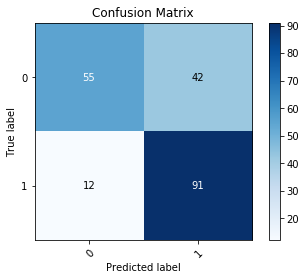

In [46]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,'Confusion Matrix')

In [48]:
print("label precision recall")
for label in range(2):
    print(f"{label:5d} {precision(label, cm):9.3f} {recall(label, cm):6.3f}")

label precision recall
    0     0.821  0.567
    1     0.684  0.883


In [49]:
print("Accuracy = ", (accuracy(cm)*100))

Accuracy =  73.0
